In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/urbansound8k/UrbanSound8K.csv
/kaggle/input/urbansound8k/fold7/164797-2-0-8.wav
/kaggle/input/urbansound8k/fold7/177537-7-2-0.wav
/kaggle/input/urbansound8k/fold7/177729-0-0-68.wav
/kaggle/input/urbansound8k/fold7/6902-2-0-18.wav
/kaggle/input/urbansound8k/fold7/518-4-0-2.wav
/kaggle/input/urbansound8k/fold7/146845-0-0-2.wav
/kaggle/input/urbansound8k/fold7/116485-3-2-4.wav
/kaggle/input/urbansound8k/fold7/518-4-0-3.wav
/kaggle/input/urbansound8k/fold7/44737-5-0-2.wav
/kaggle/input/urbansound8k/fold7/201988-5-0-3.wav
/kaggle/input/urbansound8k/fold7/181102-9-0-50.wav
/kaggle/input/urbansound8k/fold7/99812-1-6-0.wav
/kaggle/input/urbansound8k/fold7/39857-5-0-0.wav
/kaggle/input/urbansound8k/fold7/61503-2-0-6.wav
/kaggle/input/urbansound8k/fold7/162728-1-0-0.wav
/kaggle/input/urbansound8k/fold7/89443-9-0-48.wav
/kaggle/input/urbansound8k/fold7/168846-5-1-13.wav
/kaggle/input/urbansound8k/fold7/149193-5-0-2.wav
/kaggle/input/urbansound8k/fold7/71529-4-0-2.wav
/kaggle/input/u

In [2]:
import pandas as pd

In [3]:
data_path = '/kaggle/input/urbansound8k'

In [4]:
df = pd.read_csv('/kaggle/input/urbansound8k/UrbanSound8K.csv')
df

,slice_file_name,fsID,start,end,salience,fold,classID,class
0,100032-3-0-0.wav,100032,0.000000,0.317551,1,5,3,dog_bark
1,100263-2-0-117.wav,100263,58.500000,62.500000,1,5,2,children_playing
2,100263-2-0-121.wav,100263,60.500000,64.500000,1,5,2,children_playing
3,100263-2-0-126.wav,100263,63.000000,67.000000,1,5,2,children_playing
4,100263-2-0-137.wav,100263,68.500000,72.500000,1,5,2,children_playing
...,...,...,...,...,...,...,...,...
8727,99812-1-2-0.wav,99812,159.522205,163.522205,2,7,1,car_horn
8728,99812-1-3-0.wav,99812,181.142431,183.284976,2,7,1,car_horn
8729,99812-1-4-0.wav,99812,242.691902,246.197885,2,7,1,car_horn
8730,99812-1-5-0.wav,99812,253.209850,255.741948,2,7,1,car_horn


Combining all folds 

In [5]:
df.iloc[0, 0] 

'100032-3-0-0.wav'

In [6]:
for idx, (val, i) in enumerate(zip(df["slice_file_name"], df["fold"])):
    str = f'/fold{i}/{val}'
    df.iloc[idx,0]= str

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8732 entries, 0 to 8731
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   slice_file_name  8732 non-null   object 
 1   fsID             8732 non-null   int64  
 2   start            8732 non-null   float64
 3   end              8732 non-null   float64
 4   salience         8732 non-null   int64  
 5   fold             8732 non-null   int64  
 6   classID          8732 non-null   int64  
 7   class            8732 non-null   object 
dtypes: float64(2), int64(4), object(2)
memory usage: 545.9+ KB


In [8]:
df = df[['slice_file_name', 'classID']]  # Reassigning the result back to df


In [9]:
df

,slice_file_name,classID
0,/fold5/100032-3-0-0.wav,3
1,/fold5/100263-2-0-117.wav,2
2,/fold5/100263-2-0-121.wav,2
3,/fold5/100263-2-0-126.wav,2
4,/fold5/100263-2-0-137.wav,2
...,...,...
8727,/fold7/99812-1-2-0.wav,1
8728,/fold7/99812-1-3-0.wav,1
8729,/fold7/99812-1-4-0.wav,1
8730,/fold7/99812-1-5-0.wav,1


In [10]:
import math, random
import torch
import torchaudio
from torchaudio import transforms
from IPython.display import Audio
import matplotlib.pyplot as plt

In [11]:
class AudioUtil():
    #load an audio file. Return the signal as a tensor and the sample rate
    @staticmethod
    def open(audio_file):
        sig, sr = torchaudio.load(audio_file)
        return sig, sr
    #playing the audio
    def play(url):
        Audio(url)
    
    #Resize to the same length
    # Pad (or trucate) the signal to a fixed lenght 'max_ms' in milliseconds
    @staticmethod
    def pad_trunc(aud, max_ms):
        sig, sr = aud
        num_rows, sig_len = sig.shape
        max_len = sr//1000 * max_ms
        
        if (sig_len > max_len):
            sig = sig[:, :max_len]

        elif (sig_len < max_len):
            #padding length
            pad_begin_len = random.randint(0, max_len - sig_len)
            pad_end_len = max_len - sig_len - pad_begin_len

            #pad with 0s
            pad_begin = torch.zeros((num_rows, pad_begin_len))
            pad_end = torch.zeros((num_rows, pad_end_len))

            sig = torch.cat((pad_begin, sig, pad_end),1)

        return (sig, sr)
    #conveting all audio to 2 audio channels
    
    @staticmethod
    def rechannel(aud, new_channel):
        sig, sr = aud

        if (sig.shape[0] == new_channel):
            return aud

        if (new_channel == 1):
            resig = sig[:1, :]
        else:
            resig = torch.cat([sig,sig])
        return ((resig, sr))

    #Resampling one channel at a time
    @staticmethod
    def resample(aud,newsr):
        sig, sr = aud
        if (sr == newsr):
            return aud

        num_channels = sig.shape[0]
        resig = torchaudio.transforms.Resample(sr, newsr)(sig[:1,:])
        if (num_channels > 1):
            retwo = torchaudio.transforms.Resample(sr, newsr)(sig[1:,:])
            resig = torch.cat([resig, retwo])
        return ((resig, newsr))

    #data augmentation: Time Shift
    def time_shift(aud, shift_limit):
        sig, sr = aud
        _, sig_len = sig.shape
        shift_amt = int(random.random() * shift_limit * sig_len)
        return (sig.roll(shift_amt), sr)

    #Mel Spectrogram
    @staticmethod
    def spectro_gram(aud, n_mels = 64, n_fft = 1024, hop_len = None):
        sig, sr = aud
        top_db = 80

        #spec has shape [channels, n_mels, time], where channel is mono, stereo etc
        spec = transforms.MelSpectrogram(sr, n_fft=n_fft, hop_length=hop_len, n_mels=n_mels)(sig)

        #cnvert to decibals
        spec = transforms.AmplitudeToDB(top_db= top_db)(spec)
        return (spec)

    #Data Augmentation: Time and Frequency Masking
    @staticmethod
    def spectro_augment(spec, max_mask_pct=0.1, n_freq_masks=1, n_time_masks=1):
        _, n_mels, n_steps = spec.shape
        mask_value = spec.mean()
        aug_spec = spec

        freq_mask_param = max_mask_pct * n_mels
        for _ in range(n_freq_masks):
            aug_spec = transforms.FrequencyMasking(freq_mask_param)(aug_spec, mask_value)

        time_mask_param = max_mask_pct * n_steps
        for _ in range(n_time_masks):
            aug_spec = transforms.TimeMasking(time_mask_param)(aug_spec, mask_value)
        return aug_spec


# ----------------------------
  # Plot the audio signal
  # ----------------------------
    def show_wave(aud, label='', ax=None):
        sig, sr = aud
        if (not ax):
            _,ax = plt.subplots(1, 1, figsize=(3, 3))
        ax.plot(sig[0])
        ax.set_title(label)
    
    # ----------------------------
    # Plot the audio signal before and after a transform
    # ----------------------------
    def show_transform(orig, trans):
        osig,osr = orig
        tsig,tsr = trans
        if orig is not None: plt.plot(osig[0], 'm', label="Orig.")
        if trans is not None: plt.plot(tsig[0], 'c', alpha=0.5, label="Transf.")
        plt.legend()
        plt.show()
    
    # ----------------------------
    # Plot the spectrogram
    # ----------------------------
    def show_spectro(spec, label='', ax=None, figsize=(6,6)):
        if (not ax):
            _, ax = plt.subplots(1, 1, figsize=figsize)
        
        # If the spectrogram has more than one channel, average the channels
        if spec.ndim == 3:
            spec = spec.mean(axis=0)  # Average the two channels (along axis 0)
        
        ax.imshow(spec.squeeze(0))  # Remove any singleton dimensions
        ax.set_title(f'{label}, {list(spec.shape)}')


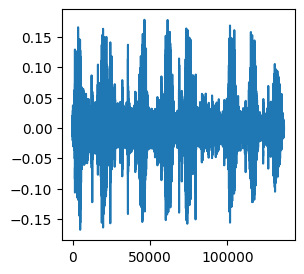

In [12]:
url=data_path+df.iloc[100, 0]
aud= AudioUtil.open(url)
AudioUtil.show_wave(aud)
# print(sig, sr)


tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]])


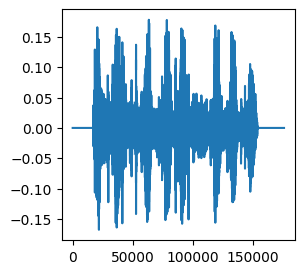

In [13]:
aud =AudioUtil.pad_trunc(aud, 4000)
AudioUtil.show_wave(aud)
print(aud[0])


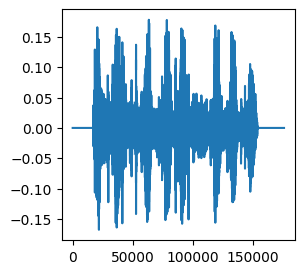

In [14]:
aud = AudioUtil.rechannel(aud, 2)
AudioUtil.show_wave(aud)

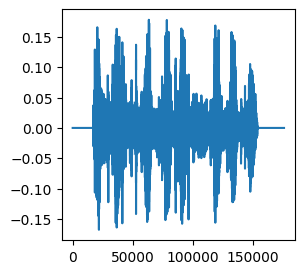

In [15]:
aud = AudioUtil.resample(aud, 44100)
AudioUtil.show_wave(aud)

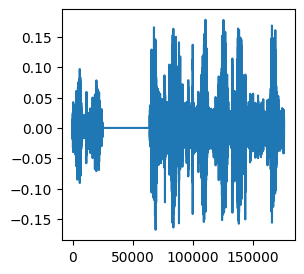

In [16]:
aud = AudioUtil.time_shift(aud, 0.4)
AudioUtil.show_wave(aud)

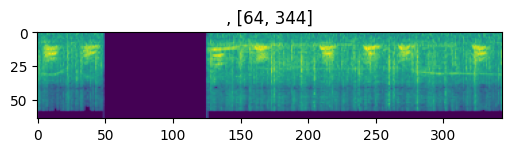

In [17]:
sgram = AudioUtil.spectro_gram(aud)
AudioUtil.show_spectro(sgram)


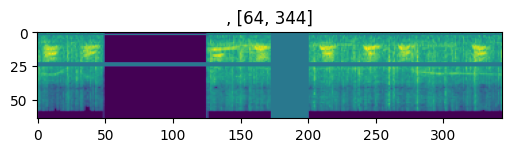

In [18]:
sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)
AudioUtil.show_spectro(sgram)


Define Custom Data Loader

In [19]:
from torch.utils.data import DataLoader, Dataset, random_split

In [20]:
class SoundDS(Dataset):
    def __init__(self, df, data_path):
        self.df = df
        self.data_path = data_path
        self.duration = 4000
        self.sr = 44100
        self.channel = 2
        self.shift_pct = 0.4

    #Number of items in dataset
    def __len__(self):
        return len(self.df)

    #Get i'th item in dataset
    def __getitem__(self, idx):
        #Absolute file path of the audio file
        audio_file = self.data_path + self.df.iloc[idx, 0]
        #get classID
        class_id = self.df.iloc[idx, 1]

        aud = AudioUtil.open(audio_file)
        reaud = AudioUtil.resample(aud, self.sr)
        rechan = AudioUtil.rechannel(reaud, self.channel)

        dur_aud = AudioUtil.pad_trunc(rechan, self.duration)
        shift_aud = AudioUtil.time_shift(dur_aud, self.shift_pct)
        sgram = AudioUtil.spectro_gram(shift_aud, n_mels= 64, n_fft = 1024, hop_len=None)
        aug_sgram = AudioUtil.spectro_augment(sgram, max_mask_pct=0.1, n_freq_masks=2, n_time_masks=2)

        return aug_sgram, class_id

In [21]:
from torch.utils.data import Dataset, DataLoader


In [22]:
myds = SoundDS(df, data_path)
# Random split of 80:20 between training and validataion
# num_item = 0
num_items = len(myds)
num_train = round(num_items * 0.8)
num_val = num_items - num_train
train_da, val_da = random_split(myds, [num_train, num_val])

#Create training and validataion data loaders
train_dl = torch.utils.data.DataLoader(train_da, batch_size=16, shuffle= True)
val_dl = torch.utils.data.DataLoader(val_da, batch_size=16, shuffle=False)


CNN Model and linear Model

In [23]:
import torch.nn.functional as F
import torch.nn as nn
from torch.nn import init
import torch

In [24]:
class AudioClassifier (nn.Module):

    def __init__(self):
        super().__init__()
        conv_layers = []

        #first conv layer
        self.conv1 = nn.Conv2d(2, 8, kernel_size=(5, 5), stride=(2, 2), padding=(2, 2))
        self.relu1 = nn.ReLU()
        self.bn1 = nn.BatchNorm2d(8)
        init.kaiming_normal_(self.conv1.weight, a=0.1)
        self.conv1.bias.data.zero_()
        conv_layers += [self.conv1, self.relu1, self.bn1]

        #Second conv layer
        self.conv2 = nn.Conv2d(8, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
        self.relu2 = nn.ReLU()
        self.bn2 = nn.BatchNorm2d(16)
        init.kaiming_normal_(self.conv2.weight, a=0.1)
        self.conv2.bias.data.zero_()
        conv_layers += [self.conv2, self.relu2, self.bn2]

        #third conv layer
        self.conv3 = nn.Conv2d(16, 32, kernel_size=(3, 3), stride= (2,2), padding=(1,1))
        self.relu3 = nn.ReLU()
        self.bn3 = nn.BatchNorm2d(32)
        init.kaiming_normal_(self.conv3.weight, a=0.1)
        self.conv3.bias.data.zero_()
        conv_layers += [self.conv3, self.relu3, self.bn3]

        #fourth conv layer
        self.conv4 = nn.Conv2d(32, 64, kernel_size=(3, 3), stride= (2,2), padding=(1,1))
        self.relu4 = nn.ReLU()
        self.bn4 = nn.BatchNorm2d(64)
        init.kaiming_normal_(self.conv4.weight, a=0.1)
        self.conv4.bias.data.zero_()
        conv_layers += [self.conv4, self.relu4, self.bn4]

        # Linear Classifier
        self.ap = nn.AdaptiveAvgPool2d(output_size=1)
        self.lin = nn.Linear(in_features=64, out_features=10)

        #wrap the convolutional blocks
        self.conv = nn.Sequential(*conv_layers)


    #Forward Propagation
    def forward(self, x):
        x = self.conv(x)
        x = self.ap(x)
        x = x.view(x.shape[0], -1)
        x = self.lin(x)
        return x

myModel = AudioClassifier()
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
myModel = myModel.to(device)
next(myModel.parameters()).device

device(type='cpu')

Training loop

In [25]:
plotting_data = []

In [26]:
def training(model, train_dl, num_epochs):
    criterion = nn.CrossEntropyLoss()
    optimizer = torch.optim.Adam(model.parameters(),lr=0.001)
    scheduler = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr=0.001,\
                                                   steps_per_epoch=int((len(train_dl))),\
                                                   epochs=num_epochs,\
                                                   anneal_strategy='linear')
    for epoch in range(num_epochs):
        # list = []
        running_loss = 0.0
        correct_prediction = 0
        total_prediction = 0

        for i, data in enumerate(train_dl):
            inputs, labels = data[0].to(device), data[1].to(device)
            #Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m)/inputs_s

            #zero the parameter gradients
            optimizer.zero_grad()

            # forward + backward + optimize

            outputs = model(inputs)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()
            scheduler.step()

            #keep stats for loss and accuracy
            running_loss += loss.item()

            #get the predicted class with the highest score
            _, prediction = torch.max(outputs, 1)
            #count of predictions that matched the target label
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]

            if i%10 ==0:
                print('[%d, %5d] loss: %.3f' % (epoch +1,i+1, running_loss/10))

        num_batches = len(train_dl)
        avg_loss = running_loss / num_batches
        acc = correct_prediction/total_prediction
        print(f'Epoch: {epoch}, Loss: {avg_loss:.2f}, Accuracy: {acc:.2f}')
        plotting_data.append([epoch, avg_loss, acc])

    print('Finished Training')
num_epochs = 10
training(myModel, train_dl, num_epochs)
            

[1,     1] loss: 0.233
[1,    11] loss: 2.534
[1,    21] loss: 4.852
[1,    31] loss: 7.173
[1,    41] loss: 9.473
[1,    51] loss: 11.760
[1,    61] loss: 14.026
[1,    71] loss: 16.256
[1,    81] loss: 18.463
[1,    91] loss: 20.645
[1,   101] loss: 22.821
[1,   111] loss: 25.009
[1,   121] loss: 27.139
[1,   131] loss: 29.226
[1,   141] loss: 31.380
[1,   151] loss: 33.428
[1,   161] loss: 35.460
[1,   171] loss: 37.572
[1,   181] loss: 39.616
[1,   191] loss: 41.692
[1,   201] loss: 43.688
[1,   211] loss: 45.744
[1,   221] loss: 47.743
[1,   231] loss: 49.817
[1,   241] loss: 51.810
[1,   251] loss: 53.853
[1,   261] loss: 55.801
[1,   271] loss: 57.770
[1,   281] loss: 59.665
[1,   291] loss: 61.635
[1,   301] loss: 63.546
[1,   311] loss: 65.457
[1,   321] loss: 67.317
[1,   331] loss: 69.175
[1,   341] loss: 71.105
[1,   351] loss: 72.993
[1,   361] loss: 74.923
[1,   371] loss: 76.754
[1,   381] loss: 78.674
[1,   391] loss: 80.564
[1,   401] loss: 82.532
[1,   411] loss: 84.2

Inference

In [27]:
print(plotting_data)

[[0, 2.0361336810637938, 0.2794159748067564], [1, 1.6555198875662938, 0.4414543372459204], [2, 1.4193876073344076, 0.5090180360721442], [3, 1.2249786635558175, 0.5870312052676783], [4, 1.1160219806146294, 0.6232464929859719], [5, 1.0109224601795799, 0.657314629258517], [6, 0.9555961842940656, 0.6774978528485542], [7, 0.8852445586185979, 0.7075579730890352], [8, 0.8501802336433114, 0.7211565989121099], [9, 0.8220693117148271, 0.7250214715144575]]


In [30]:
def inference(model, val_dl):
    correct_prediction = 0 
    total_prediction = 0
    #Disable gradient updates
    with torch.no_grad():
        for data in val_dl:
            inputs, labels = data[0].to(device), data[1].to(device)

            # Normalize the inputs
            inputs_m, inputs_s = inputs.mean(), inputs.std()
            inputs = (inputs - inputs_m)/inputs_s

            outputs = model(inputs)

            _, prediction = torch.max(outputs,1)
            correct_prediction += (prediction == labels).sum().item()
            total_prediction += prediction.shape[0]

    acc = correct_prediction/total_prediction
    print(f'Accuracy: {acc:.2f}, Total items:{total_prediction}')

inference(myModel, val_dl)

Accuracy: 0.73, Total items:1746


In [33]:
type(plotting_data)

list

In [44]:
p_data = pd.DataFrame(plotting_data)

In [45]:
p_data

,0,1,2
0,0,2.036134,0.279416
1,1,1.655520,0.441454
2,2,1.419388,0.509018
3,3,1.224979,0.587031
4,4,1.116022,0.623246
5,5,1.010922,0.657315
6,6,0.955596,0.677498
7,7,0.885245,0.707558
8,8,0.850180,0.721157
9,9,0.822069,0.725021


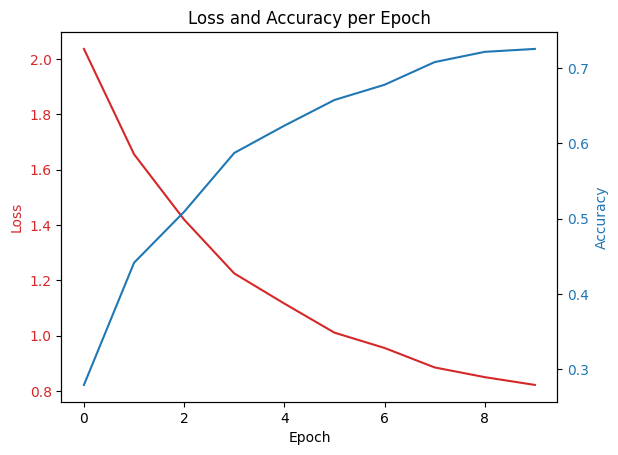

In [46]:
fig, ax1 = plt.subplots()

# Plot Loss on the first axis
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss', color='tab:red')
ax1.plot(p_data.iloc[:,0], p_data.iloc[:,1], label='Loss', color='tab:red')
ax1.tick_params(axis='y', labelcolor='tab:red')

# Create a second y-axis for Accuracy
ax2 = ax1.twinx()
ax2.set_ylabel('Accuracy', color='tab:blue')
ax2.plot(p_data.iloc[:,0], p_data.iloc[:,2], label='Accuracy', color='tab:blue')
ax2.tick_params(axis='y', labelcolor='tab:blue')

# Add a title
plt.title('Loss and Accuracy per Epoch')

# Show the plot
plt.show()